In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np      
from matplotlib.ticker import FormatStrFormatter

In [70]:
digikala = pd.read_csv('src\data\digikala_dataset.csv')
digikala.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [71]:
print(digikala['DateTime_CartFinalize'].dtype)

#converting the type of Invoice Date Field from string to datetime.
digikala['DateTime_CartFinalize'] = pd.to_datetime(digikala['DateTime_CartFinalize'])

object


In [72]:
#creating YearMonth field for the ease of reporting and visualization
digikala['YearMonth'] = digikala['DateTime_CartFinalize'].map(lambda date: 100 * date.year + date.month)
digikala

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,YearMonth
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605
...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01,344037.0,تهران,2.0,201804
199996,4425393,3745774,131645,2016-07-09 19:14:09,600000.0,محمدیه,1.0,201607
199997,6671889,4845514,215045,2017-03-08 23:47:06,450000.0,اصفهان,1.0,201703
199998,6315995,2541418,264021,2017-02-08 14:59:39,193486.0,همدان,1.0,201702


In [73]:
# get Order per month
Order_perMonth = digikala.groupby(digikala['YearMonth'])['ID_Order'].count().reset_index()
Order_perMonth

,YearMonth,ID_Order
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141
...,...,...
59,201808,6040
60,201809,6567
61,201810,5547
62,201811,6002


In [74]:
Order_perMonth['YearMonth']

0     201309
1     201310
2     201311
3     201312
4     201401
       ...  
59    201808
60    201809
61    201810
62    201811
63    201812
Name: YearMonth, Length: 64, dtype: int64

In [75]:
Order_perMonth.shape

(64, 2)

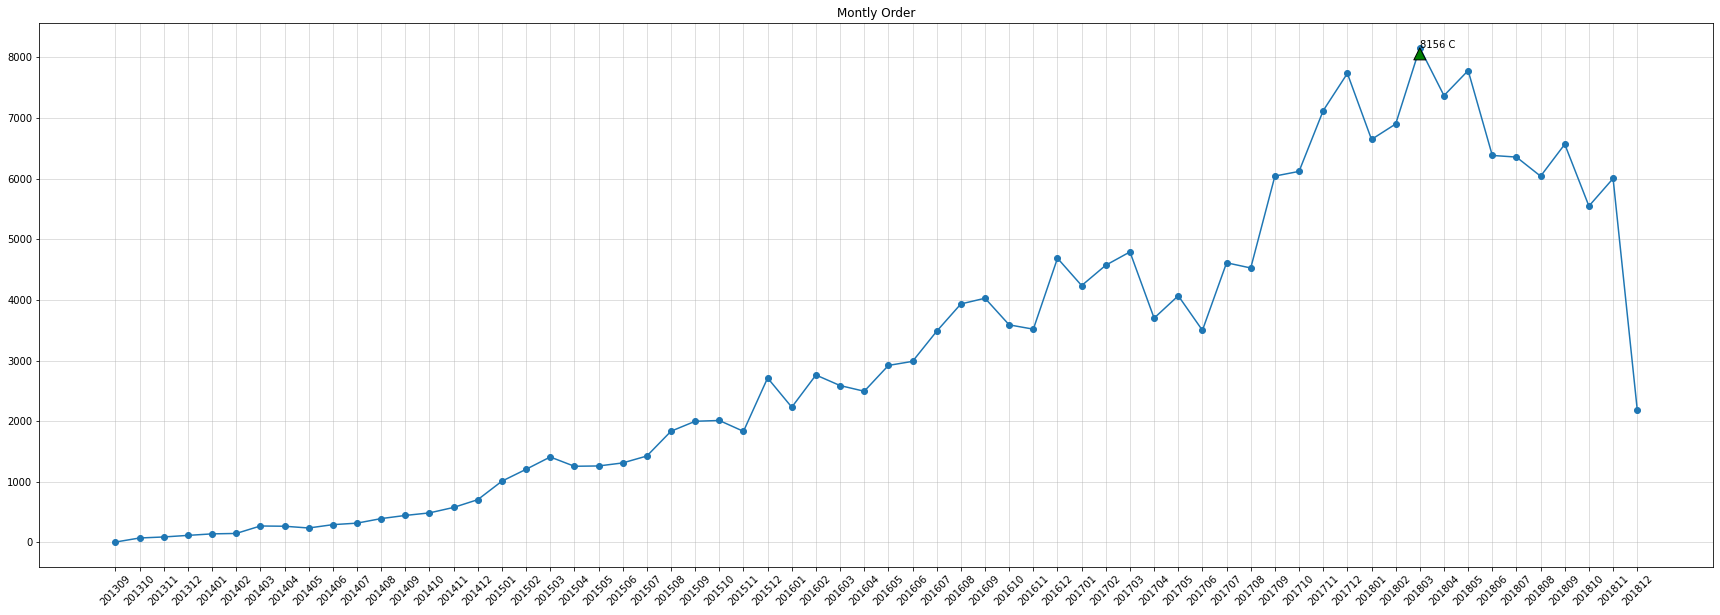

In [76]:
# set distance between ticks
plt.figure(figsize= (30, 10))

# # change Unit of measurement y ticks to M
# scale_y = 1e6
# Order_perMonth['Quantity_item'] = Order_perMonth['Revenue'].map(lambda ticks_y: ticks_y/scale_y)
# Order_perMonth['Quantity_item']
# plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%y/%m'))

# plot fig
plt.plot(Order_perMonth['YearMonth'].to_numpy(dtype = 'str') , Order_perMonth['ID_Order'], marker='o')
plt.title('Montly Order')
plt.grid(alpha = 0.5)
plt.xticks(rotation= 45)
# show Max Revenue point

ymax = Order_perMonth['ID_Order'].max()
ymaxStr = str(round(ymax,5))
ymaxStr = (ymaxStr+ ' C')

xpos = Order_perMonth.loc[Order_perMonth['ID_Order']== ymax]['YearMonth']
xmax = xpos.to_numpy(dtype= 'str')
 
plt.annotate(ymaxStr, xy=(xmax, ymax), xytext= (xmax, ymax), arrowprops=dict(facecolor='green'),)

# # show Min Order point

# ymin = Order_perMonth[Order_perMonth['YearMonth']]['Quantity_item'].min()
# yminStr = str(round(ymin,5))
# yminStr = (yminStr+ ' C')

# xpos = Order_perMonth.loc[Order_perMonth['Quantity_item']== ymin]['YearMonth']
# xmin = xpos.to_numpy(dtype= 'str')
 
# plt.annotate(yminStr, xy=(xmin, ymin), xytext= (xmin, ymin), arrowprops=dict(facecolor='red'),)

plt.show()


In [77]:
xpoints = digikala.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
xpoints.head()


,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2


In [78]:
xpoints2 = xpoints.sort_values('ID_Customer', ascending= False )
xpoints2.head()


,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353


In [79]:
tops = xpoints2['city_name_fa'][0:8]
tops.head()

215     تهران
815       کرج
654      مشهد
76     اصفهان
97      اهواز
Name: city_name_fa, dtype: object

In [80]:
others = xpoints2['ID_Customer'][8:].count()
others


898

In [81]:
sum_others = xpoints2['ID_Customer'][8:].sum()
sum_others


47647

In [82]:
xpoints_pie = pd.DataFrame(xpoints2[0:8])
xpoints_pie.head(10)
# xpoints2 = xpoints2.sort_values('ID_Customer', ascending= False )[0:10]
# xpoints2.head()
# mylabels = [tops.values, 'سایر']

# mylabels

,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353
505,شیراز,3076
355,رشت,2414
202,تبریز,2075


In [83]:
new_row = {'city_name_fa':'سایر', 'ID_Customer':sum_others}
xpoints_pie = xpoints_pie.append(new_row, ignore_index=True)
xpoints_pie


C:\Users\SONY\AppData\Local\Temp\ipykernel_10812\963414332.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xpoints_pie = xpoints_pie.append(new_row, ignore_index=True)


,city_name_fa,ID_Customer
0,تهران,81048
1,کرج,4758
2,مشهد,4674
3,اصفهان,4664
4,اهواز,3353
5,شیراز,3076
6,رشت,2414
7,تبریز,2075
8,سایر,47647


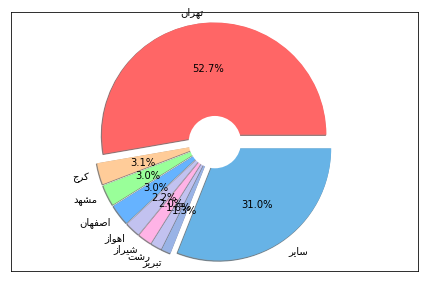

In [94]:
# Pie Chart and Persian Language in Python:
# https://medium.com/@amirashabani/pie-chart-and-persian-language-in-python-68dfd03a26fb

# install: pip install --upgrade arabic-reshaper
from arabic_reshaper import reshape

# install: pip install python-bidi
from bidi.algorithm import get_display
# plt.figure(figsize=(12, 24))

labels = xpoints_pie['city_name_fa'].to_numpy(dtype='str')
persian_labels = [get_display(reshape(label)) for label in labels]

colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6', '#c2c2f0','#99b3e6', '#67b3e6']
explode = (0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2) 

fig1, ax1 = plt.subplots()

ax1.pie(xpoints_pie['ID_Customer'], labels= persian_labels,colors= colors, shadow=True, autopct='%1.1f%%', frame=True, explode=explode,radius=3) 

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
figure = plt.gca()

x_axis = figure.axes.get_xaxis()
x_axis.set_visible(False)

y_axis = figure.axes.get_yaxis()
y_axis.set_visible(False)

plt.tight_layout()

plt.show()